Situación Profesional Logistic Regression Model
https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial/notebook#9.-Split-data-into-separate-training-and-test-set-

Profesor: Ing. Narciso Pérez

Alumna: Carina Giovine

Tecnicatura en Cs de Ds e IA - Cohorte 2020.

PRIMERA PARTE DE MATRIC DE 20 ELEMENTOS

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
# Preprocesado, modelado y métricas:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
#generar muestra de 20 valores que siguen una distribución normal
ma_nor=np.random.normal(0,1,20)
ma_nor

array([-0.4350634 ,  2.08037593,  1.64949448, -1.56684007, -0.2364443 ,
        0.31022279, -0.35328313, -0.75303931, -0.57343807,  0.87037066,
       -1.08687274,  1.54971571,  0.70477837, -1.48714133, -1.8578482 ,
       -1.91084833, -0.40751041,  2.08735561,  0.38419478, -0.06668795])

In [3]:
#Media
media= np.mean(ma_nor)
media

-0.054925444641995134

In [4]:
#Media
media= np.mean(ma_nor)
media

-0.054925444641995134

In [5]:
# Standard Deviation
r2 = np.std(ma_nor)
r2

1.2172191846851892

In [6]:
# Calculo la varianza del array con distribución normal:
varianza = np.var(ma_nor)
varianza

1.4816225435656767

(array([3., 1., 2., 4., 2., 2., 2., 0., 2., 2.]),
 array([-1.91084833, -1.51102793, -1.11120754, -0.71138715, -0.31156675,
         0.08825364,  0.48807404,  0.88789443,  1.28771483,  1.68753522,
         2.08735561]),
 <a list of 10 Patch objects>)

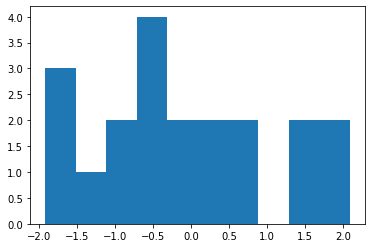

In [7]:
plt.hist(ma_nor)

In [8]:
#uniform distribution
ma_uni=np.random.uniform(0,1,20)
ma_uni

array([0.2336538 , 0.81615901, 0.21751238, 0.51039195, 0.86879089,
       0.78579869, 0.56809713, 0.12255818, 0.71633108, 0.77348847,
       0.94386294, 0.92595479, 0.41140951, 0.11713853, 0.78539469,
       0.44175904, 0.97856012, 0.91200679, 0.70681264, 0.72616612])

(array([2., 2., 0., 2., 1., 1., 2., 4., 2., 4.]),
 array([0.11713853, 0.20328069, 0.28942284, 0.375565  , 0.46170716,
        0.54784932, 0.63399148, 0.72013364, 0.8062758 , 0.89241796,
        0.97856012]),
 <a list of 10 Patch objects>)

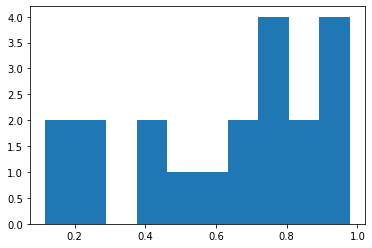

In [9]:
plt.hist(ma_uni)

In [10]:
#creamos datos sesgados
ma_ses=np.random.lognormal(0,1,20)
ma_ses

array([0.11056562, 0.12810774, 1.05353634, 1.34606359, 1.68768827,
       1.74272546, 0.53941352, 0.59866915, 1.37416856, 0.91725905,
       0.51279624, 0.62798181, 0.63416699, 0.68741411, 0.29258297,
       0.36787642, 2.68081184, 0.86615024, 2.78705787, 1.8525746 ])

(array([4., 5., 2., 2., 2., 1., 2., 0., 0., 2.]),
 array([0.11056562, 0.37821485, 0.64586407, 0.9135133 , 1.18116252,
        1.44881175, 1.71646097, 1.9841102 , 2.25175942, 2.51940864,
        2.78705787]),
 <a list of 10 Patch objects>)

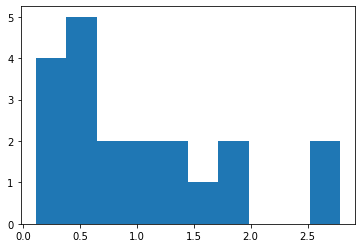

In [11]:
plt.hist(ma_ses)

In [12]:
#uno las tres distribuciones

X_train=np.append([ma_uni],[ma_ses],axis=0)
X_train=np.append(X_train,[ma_nor], axis=0)
X_train

array([[ 0.2336538 ,  0.81615901,  0.21751238,  0.51039195,  0.86879089,
         0.78579869,  0.56809713,  0.12255818,  0.71633108,  0.77348847,
         0.94386294,  0.92595479,  0.41140951,  0.11713853,  0.78539469,
         0.44175904,  0.97856012,  0.91200679,  0.70681264,  0.72616612],
       [ 0.11056562,  0.12810774,  1.05353634,  1.34606359,  1.68768827,
         1.74272546,  0.53941352,  0.59866915,  1.37416856,  0.91725905,
         0.51279624,  0.62798181,  0.63416699,  0.68741411,  0.29258297,
         0.36787642,  2.68081184,  0.86615024,  2.78705787,  1.8525746 ],
       [-0.4350634 ,  2.08037593,  1.64949448, -1.56684007, -0.2364443 ,
         0.31022279, -0.35328313, -0.75303931, -0.57343807,  0.87037066,
        -1.08687274,  1.54971571,  0.70477837, -1.48714133, -1.8578482 ,
        -1.91084833, -0.40751041,  2.08735561,  0.38419478, -0.06668795]])

In [13]:
# Genero una matriz de Pandas de 20 x 3 con las listas. De esta forma evito hacer la transpuesa 
# cada vez que quiero utilizar el array:
df = pd.DataFrame(list(zip(ma_nor, ma_uni, ma_ses)))
print(df)

           0         1         2
0  -0.435063  0.233654  0.110566
1   2.080376  0.816159  0.128108
2   1.649494  0.217512  1.053536
3  -1.566840  0.510392  1.346064
4  -0.236444  0.868791  1.687688
5   0.310223  0.785799  1.742725
6  -0.353283  0.568097  0.539414
7  -0.753039  0.122558  0.598669
8  -0.573438  0.716331  1.374169
9   0.870371  0.773488  0.917259
10 -1.086873  0.943863  0.512796
11  1.549716  0.925955  0.627982
12  0.704778  0.411410  0.634167
13 -1.487141  0.117139  0.687414
14 -1.857848  0.785395  0.292583
15 -1.910848  0.441759  0.367876
16 -0.407510  0.978560  2.680812
17  2.087356  0.912007  0.866150
18  0.384195  0.706813  2.787058
19 -0.066688  0.726166  1.852575


In [14]:
#view basic statistical details
df.describe()

,0,1,2
count,20.000000,20.000000,20.000000
mean,-0.054925,0.628092,1.040381
std,1.248841,0.282792,0.776522
min,-1.910848,0.117139,0.110566
25%,-0.836498,0.434172,0.532759
50%,-0.294864,0.721249,0.776782
75%,0.746176,0.829317,1.452548
max,2.087356,0.978560,2.787058


In [15]:
# Convierto el dataframe en un array de numpy para usar como X_train:
X_np = df.to_numpy()
X_np

array([[-0.4350634 ,  0.2336538 ,  0.11056562],
       [ 2.08037593,  0.81615901,  0.12810774],
       [ 1.64949448,  0.21751238,  1.05353634],
       [-1.56684007,  0.51039195,  1.34606359],
       [-0.2364443 ,  0.86879089,  1.68768827],
       [ 0.31022279,  0.78579869,  1.74272546],
       [-0.35328313,  0.56809713,  0.53941352],
       [-0.75303931,  0.12255818,  0.59866915],
       [-0.57343807,  0.71633108,  1.37416856],
       [ 0.87037066,  0.77348847,  0.91725905],
       [-1.08687274,  0.94386294,  0.51279624],
       [ 1.54971571,  0.92595479,  0.62798181],
       [ 0.70477837,  0.41140951,  0.63416699],
       [-1.48714133,  0.11713853,  0.68741411],
       [-1.8578482 ,  0.78539469,  0.29258297],
       [-1.91084833,  0.44175904,  0.36787642],
       [-0.40751041,  0.97856012,  2.68081184],
       [ 2.08735561,  0.91200679,  0.86615024],
       [ 0.38419478,  0.70681264,  2.78705787],
       [-0.06668795,  0.72616612,  1.8525746 ]])

In [16]:
# array de 20 x 1 para y_train:
y_np = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])
y_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
# Separo en grupos de entrenamiento y testeo.
X_train, X_test, y_train, y_test = train_test_split(X_np,y_np,test_size=0.2)

In [18]:
# muestro los tamaños de los sets que separé para entrenar y testear el modelo
print('X_train:',len(X_train))
print('X_test:  ',len(X_test))
print('y_train:',len(y_train))
print('y_test:  ',len(y_test))

X_train: 16
X_test:   4
y_train: 16
y_test:   4


Text(0, 0.5, 'Distribución Normal')

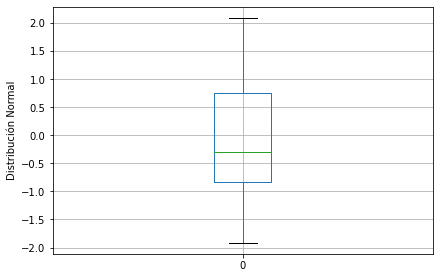

In [19]:
# draw boxplots to visualize outliers.
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
fig = df.boxplot(column=0)
fig.set_title('')
fig.set_ylabel('Distribución Normal')

Text(0, 0.5, 'Distribución Uniforme')

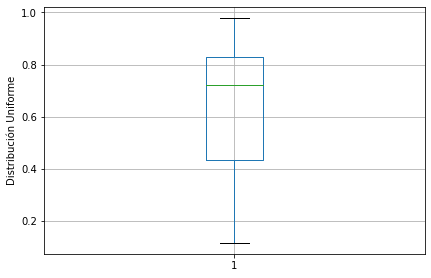

In [20]:
# draw boxplots to visualize outliers.
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
fig = df.boxplot(column=1)
fig.set_title('')
fig.set_ylabel('Distribución Uniforme')

Text(0, 0.5, 'Distribución Sesgada')

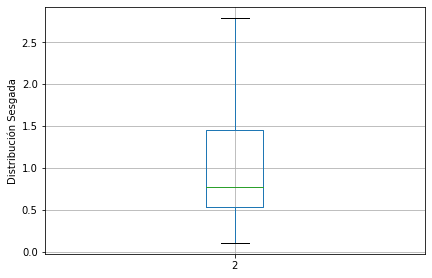

In [21]:
# draw boxplots to visualize outliers.
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
fig = df.boxplot(column=2)
fig.set_title('')
fig.set_ylabel('Distribución Sesgada')

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
escalar = StandardScaler()

In [24]:
#fit_transform, esta instrucción realiza el calculo respectivo y a su vez transforma y devuelve los datos ya escalados.
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [25]:
#Defino el algoritmo a utilizar
algoritmo = LogisticRegression()

In [26]:
#the model is trained using the fit instruction and both "X" and "y" training data

algoritmo.fit(X_train, y_train)

LogisticRegression()

In [27]:
#the prediction is performed, using the predict instruction and the test data
y_pred = algoritmo.predict(X_test)
y_pred

array([0, 0, 0, 1])

In [29]:
#confusion matrix
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[2 0]
 [1 1]]


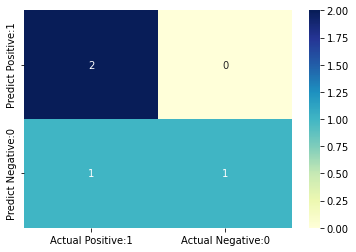

In [30]:
#confusion matrix plot
matrix = pd.DataFrame(data=matriz, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

-- Cantidad de datos que el modelo no predijo correctamente.

*La matriz nos indica que cuenta con 2 datos verdaderos positivos, es decir datos que en los datos reales eran 1 y el modelo los predijo bien.

*Por su parte es 1 el dato verdadero negativo, esto quiere decir datos reales que eran 0 y el modelo los predijo como tal.

-- Veamos ahora la cantidad de datos que el modelo no predijo correctamente. 

*Comencemos con los datos falsos negativos, en total fue de 0.

*En cuanto a los datos falsos positivos fue solamente 1 solo dato, que era en realidad 0 y el modelo lo predijo como 1.

-------------------------------------------------------------------------

Calculemos ahora todas las métricas que podemos evaluar para los modelos de clasificación.

Para calcular la precisión del algoritmo utilizamos la librería metrics de scikit-learn e importamos precision_score, y la implementamos junto con los datos reales y los que hemos obtenidos utilizando el modelo.


In [31]:
#the accuracy of the model is calculated
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
1.0


--------------------------------------------------------------------------------

Calculemos ahora la exactitud del modelo, por lo que debemos ahora importar accuracy_score, de la misma librería de metrics.

In [32]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.75


--------------------------------------------------------------------------------
Veamos ahora la sensibilidad o lo que también se le conoce como recall del algoritmo, para ello importamos recall_score.

In [33]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.5


------------------------------------------------------------------------------
Calculemos ahora el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.

In [34]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.6666666666666666
